In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [3]:
data = pd.read_csv('train.csv')
print(data.shape)


data.describe()
data.info()

(5961, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 20 columns):
link               5961 non-null object
title              5961 non-null object
price (đồng)       5961 non-null float64
type               5961 non-null object
time               5961 non-null object
description        5961 non-null object
address            5961 non-null object
area (m2)          5961 non-null int64
bedroom_num        5961 non-null object
house_type         5961 non-null object
toilet_num         5961 non-null object
direction          5961 non-null object
legcal_doc         5961 non-null object
block_name         5961 non-null object
total_floor        5961 non-null object
housing_feature    5961 non-null object
city               5961 non-null object
district           5961 non-null object
ward               5961 non-null object
street             5961 non-null object
dtypes: float64(1), int64(1), object(18)
memory usage: 931.5+ KB


In [68]:

data1 = data[['direction', 'type', 'area (m2)', 'legcal_doc', 'district', 'ward', 'street', 'total_floor', 'bedroom_num','price (đồng)']]

In [69]:
data1.sample(5)

,direction,type,area (m2),legcal_doc,district,ward,street,total_floor,bedroom_num,price (đồng)
895,Tây,Môi giới,33,Đã có sổ đỏ/sổ hồng,Quận Bình Thạnh,Phường 24,Đường Nguyễn Thiện Thuật,None,2,3.600000e+09
1619,Đông Nam,Môi giới,30,Đã có sổ đỏ/sổ hồng,Quận Bình Thạnh,Phường 5,Đường Lê Quang Định,None,2,3.650000e+09
3627,None,Môi giới,150,Đã có sổ đỏ/sổ hồng,Huyện Hóc Môn,Xã Xuân Thới Sơn,Đường Nguyễn Thị Thử,1,4,6.200000e+09
2555,None,Phạm Sang,154,Đã có sổ đỏ/sổ hồng,Quận 2,Phường Bình An,Đường Trần Não,2,4,5.100000e+09
4367,None,Môi giới,55,Đã có sổ đỏ/sổ hồng,Quận Bình Tân,Phường Bình Hưng Hòa,Đường Số 9,2,2,3.000000e+09


In [70]:
data1 = data1.apply(LabelEncoder().fit_transform)
data1.head()

,direction,type,area (m2),legcal_doc,district,ward,street,total_floor,bedroom_num,price (đồng)
0,2,512,25,3,10,19,651,2,4,366
1,8,512,45,3,22,2,146,4,6,392
2,2,512,95,3,23,107,245,2,6,582
3,2,617,95,3,22,4,309,1,5,295
4,2,512,154,1,8,111,638,0,11,524


In [71]:
train, val = train_test_split(data1, test_size = 0.3)
print(train.shape)
val.shape

(4172, 10)


(1789, 10)

In [72]:
train_col = ['direction', 'type', 'area (m2)', 'legcal_doc', 'district', 'ward', 'street']
model.fit(train[train_col], train['price (đồng)'])
model.score(val[train_col], val['price (đồng)'])

0.2980657682169535

In [73]:
model = LinearRegression()
model.fit(train[train_col], train['price (đồng)'])
model.score(val[train_col], val['price (đồng)'])

0.2980657682169535

In [74]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score, GridSearchCV
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import Imputer, OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVR, SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.externals import joblib
from random import randint
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import itertools

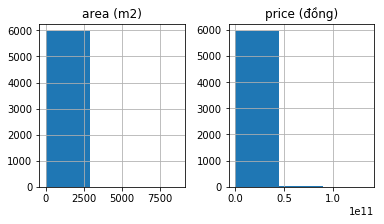

In [75]:
data.hist(bins=3, figsize=(6,3))
plt.show()

In [76]:
data.columns

Index(['link', 'title', 'price (đồng)', 'type', 'time', 'description',
       'address', 'area (m2)', 'bedroom_num', 'house_type', 'toilet_num',
       'direction', 'legcal_doc', 'block_name', 'total_floor',
       'housing_feature', 'city', 'district', 'ward', 'street'],
      dtype='object')

In [90]:
data.head(3)

,link,title,price (đồng),type,time,description,address,area (m2),bedroom_num,house_type,toilet_num,direction,legcal_doc,block_name,total_floor,housing_feature,city,district,ward,street
0,https://nha.chotot.com//tp-ho-chi-minh/quan-3/...,Bán Gấp Nhà Hẻm 4m Nguyễn Đình Chiểu,3.150000e+09,Môi giới,11/15/2019 7:52,"Lo công việc bán nhà hẻm 4m Nguyễn Đình Chiểu,...","Đường Nguyễn Đình Chiểu, Phường 4, Quận 3, Tp ...",30,2,Nhà,2,None,Đã có sổ đỏ/sổ hồng,None,2,Hẻm xe hơi,Tp Hồ Chí Minh,Quận 3,Phường 4,Đường Nguyễn Đình Chiểu
1,https://nha.chotot.com//tp-ho-chi-minh/quan-ta...,"Tân bình khu bàu cát,kinh doanh sầm uất ,2 lầu",3.550000e+09,Môi giới,11/15/2019 10:20,"QUẬN TÂN BÌNH,H6M,2 LẦU GIÁ CHỈ CÓ 3,65 TỶ\nHẻ...","Đường Bàu Cát 1||7379, Phường 11, Quận Tân Bìn...",50,4,Nhà,3,Đông Nam,Đã có sổ đỏ/sổ hồng,None,3,Hẻm xe hơi,Tp Hồ Chí Minh,Quận Tân Bình,Phường 11,Đường Bàu Cát 1||7379
2,https://nha.chotot.com//tp-ho-chi-minh/quan-ta...,"Bán nhà MTKD D11,Tây Thạnh, Tân Phú",8.200000e+09,Môi giới,11/21/2019 15:29,"Quận Tân Phú: 8,2 tỷ\nBán nhà MTKD D11, Tây Th...","Đường D11, Phường Tây Thạnh, Quận Tân Phú, Tp ...",100,4,Nhà,None,None,Đã có sổ đỏ/sổ hồng,None,2,Mặt tiền,Tp Hồ Chí Minh,Quận Tân Phú,Phường Tây Thạnh,Đường D11


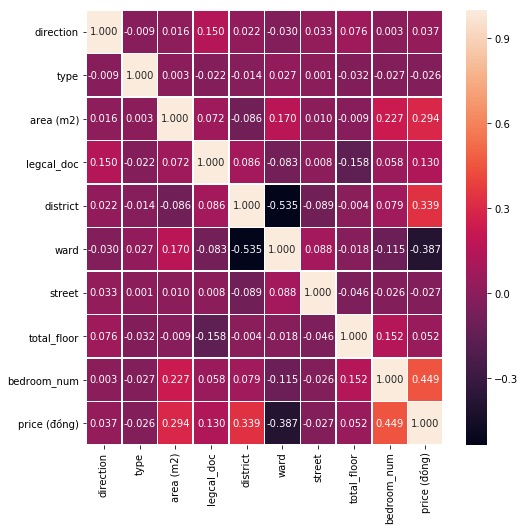

In [96]:
f,ax = plt.subplots(figsize=(8,8))
sns.heatmap(data1.corr(), annot = True, linewidth = .5, fmt = ".3f",ax = ax)
plt.show()